# Dust collection!

Couple of experiments on the performance of our dust collection setup in the wood shop
of [NYIC](https://nyic.shop/).

I used a handheld air quality meter I got from Amazon during the
Canadian wildfires that affected NYC in mid 2023. I can't find much info about
the product, but it's readings have matched up well with our Dyson (air filter)
at home, so I'm guessing it's good.

## Experiments

|op|description|
|---|---|
| **joint** | Ran the jointer with dust collection turned off, making about 5 passes on a smallish board of pine. |
| **joint_extract** | Same as above, but with dust collection running. |
| **bandsaw** | Made 4 cuts on the bandsaw, through that same piece of pine, _without_ dust collection. |
| **sand** | Sanded a piece of pine for 1 minute on 100 grit, without any kind of dust collection. |
| **sand_extract** | Same as above, but with the festool dust extractor running.
| **miter** | Made 2 cuts on the miter saw through that poor piece of pine, with extractor turned off. |
| **miter_extract** | Same as above, but with the extractor running. |
| **sweep** | Quickly swept the floor, one loop around the workbench. |
| **sweep_air_clean** | Same as above, but with the air cleaner running. |

In addition to these, I took measurements with dust collection, festool and shop vac running (one at a time) to verify that
air quality wasn't affected. For some of the above, I did additional runs to get more data.

Here's the data:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import io

df = pd.read_csv(io.StringIO("""
op,t,pm2.5,pm1.0,pm10,AQI
joint_extract,0,3,2,3,12
joint_extract,1,5,3,5,20
joint_extract,1.5,7,5,8,29
joint_extract,2,6,4,6,25
joint_extract,3,4,3,4,16
joint,0,3,2,3,12
joint,1,6,4,6,25
joint,1.5,9,6,10,37
joint,2,10,7,11,41
joint,3,9,6,10,37
joint,4,7,5,8,29
joint,5,6,4,6,25
joint,6,5,3,5,20
joint,10,4,3,4,16
bandsaw,0,4,3,4,16
bandsaw,1,7,5,8,29
bandsaw,2,10,7,11,41
bandsaw,3,5,3,5,20
bandsaw,4,4,3,4,16
sand_extract,0,4,3,4,16
sand_extract,1,4,3,4,16
sand_extract,1.5,3,2,3,12
sand_extract,2,3,2,3,12
sand_extract,2.5,3,2,3,12
sand_extract,3,3,2,3,12
sand,0,3,2,3,12
sand,1,5,3,5,20
sand,2,4,3,4,16
sand,3,6,4,6,25
sand,4,7,5,8,29
sand,5,7,5,8,29
sand,6,7,5,8,29
sand,7,6,4,6,25
sand,9,5,3,5,20
sand,10,6,4,6,25
sand,15,4,3,4,16
miter,0,3,2,3,8
miter,1,7,5,8,29
miter,2,8,6,9,33
miter,3,4,3,4,16
miter,4,4,3,4,16
miter,10,4,3,4,16
miter_extract,0,3,2,3,12
miter_extract,1,3,2,3,16
miter_extract,2,5,3,5,20
miter_extract,3,5,3,5,20
miter_extract,4,4,3,4,16
miter_extract,10,3,2,3,12
vac_run,0,4,3,4,16
vac_run,1,4,3,4,16
vac_run,2,3,2,3,12
vac_run,3,3,2,3,12
vac_run,4,3,2,3,12
collector_run,0,4,3,4,16
collector_run,1,4,3,4,16
collection_run,10,3,2,3,12
sweep_air_clean,0,4,3,4,16
sweep_air_clean,1,4,3,4,16
sweep_air_clean,3,11,8,12,45
sweep_air_clean,4,15,11,17,57
sweep_air_clean,5,14,10,16,54
sweep_air_clean,10,10,7,11,41
sweep_air_clean,19,7,5,8,29
sweep_air_clean,36,4,3,4,16
sweep,0,3,2,3,12
sweep,2,9,6,10,37
sweep,5,8,6,9,33
sweep,7,10,7,11,41
sweep,13,9,6,10,37
sweep,24,7,5,8,29
sweep,34,7,5,8,29
sweep,50,5,3,5,20
sweep,65,4,3,4,16
"""))

df[df["op"] == "sand_extract"]

,op,t,pm2.5,pm1.0,pm10,AQI
19,sand_extract,0.0,4,3,4,16
20,sand_extract,1.0,4,3,4,16
21,sand_extract,1.5,3,2,3,12
22,sand_extract,2.0,3,2,3,12
23,sand_extract,2.5,3,2,3,12
24,sand_extract,3.0,3,2,3,12


## Worst AQI per operation

In [3]:
df.groupby("op").max().sort_values("AQI")

,t,pm2.5,pm1.0,pm10,AQI
op,,,,,
collection_run,10.0,3,2,3,12
collector_run,1.0,4,3,4,16
sand_extract,3.0,4,3,4,16
vac_run,4.0,4,3,4,16
miter_extract,10.0,5,3,5,20
joint_extract,3.0,7,5,8,29
sand,15.0,7,5,8,29
miter,10.0,8,6,9,33
bandsaw,4.0,10,7,11,41


Worst AQI measured after sweeping the floor with air cleaner running. This has nothing to
do with the air cleaner though, just a matter of me sweeping more vigorously that time
around. Air cleaner may still affect how quickly AQI falls over time.

## Plot

In [4]:
print(set(df["op"]))

def plot(df, ops, title=""):
    plt.figure(figsize=(12,8))
    if title:
        plt.title(title)
    for op in ops:
        opdf = df[df["op"] == op]
        plt.plot(opdf["t"], opdf["AQI"], label=op)
    plt.legend(loc="upper right")
    plt.grid()
    plt.ylim(0)
    plt.axhline(16)
    plt.xlabel("minutes")
    plt.ylabel("AQI")
    plt.show()

{'joint_extract', 'collector_run', 'sand_extract', 'miter', 'collection_run', 'vac_run', 'sand', 'sweep_air_clean', 'sweep', 'joint', 'bandsaw', 'miter_extract'}


### All experiments

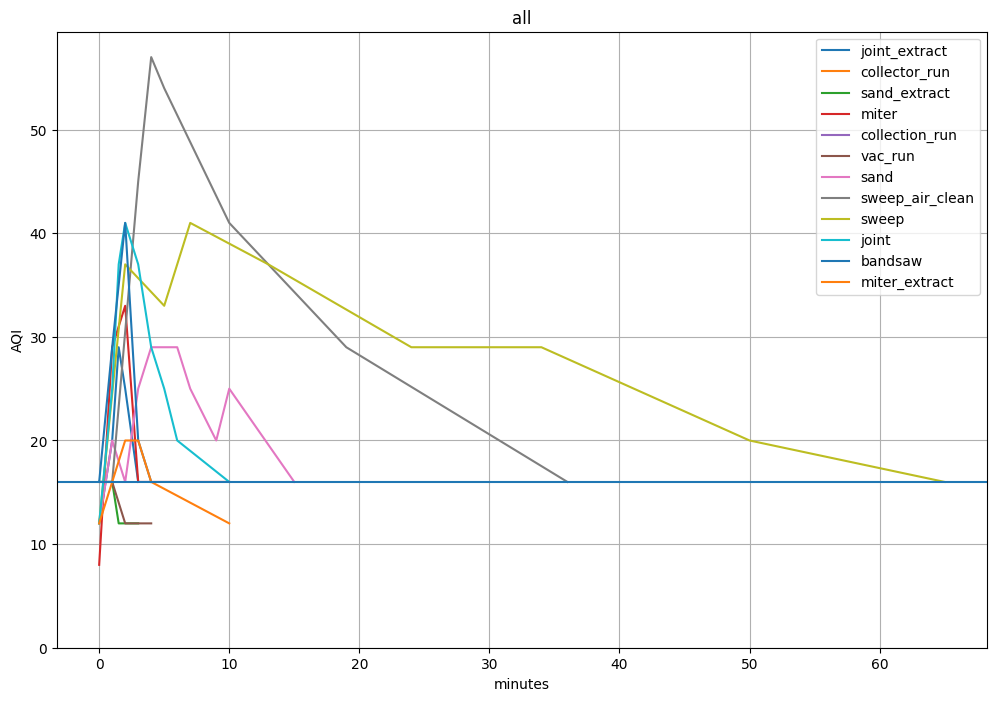

In [5]:
plot(df, set(df["op"]), "all")

### Sweeping the floor vs 1 min sanding without extraction

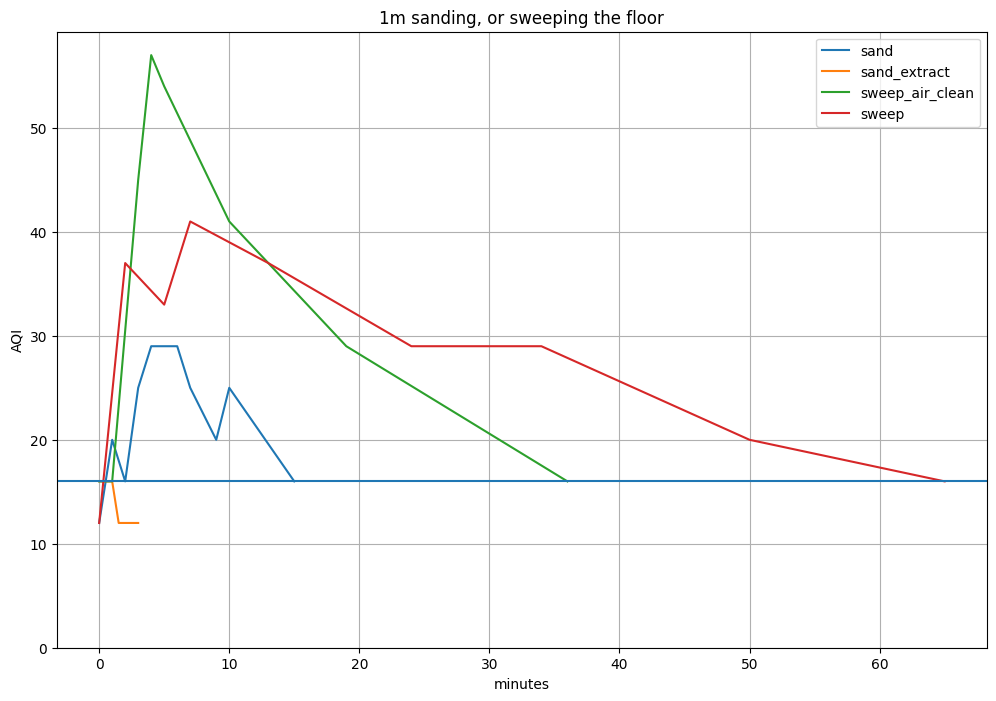

In [6]:
plot(df, ["sand", "sand_extract", "sweep_air_clean", "sweep"], "1m sanding, or sweeping the floor")

### Jointer with and without extraction

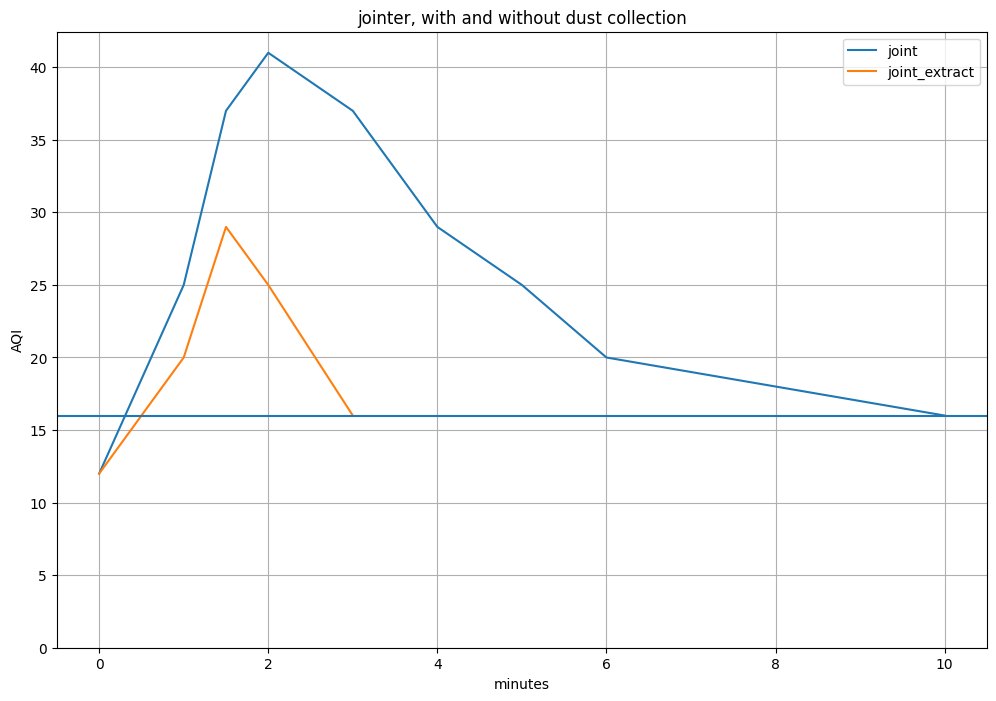

In [7]:
plot(df, ["joint", "joint_extract"], "jointer, with and without dust collection")

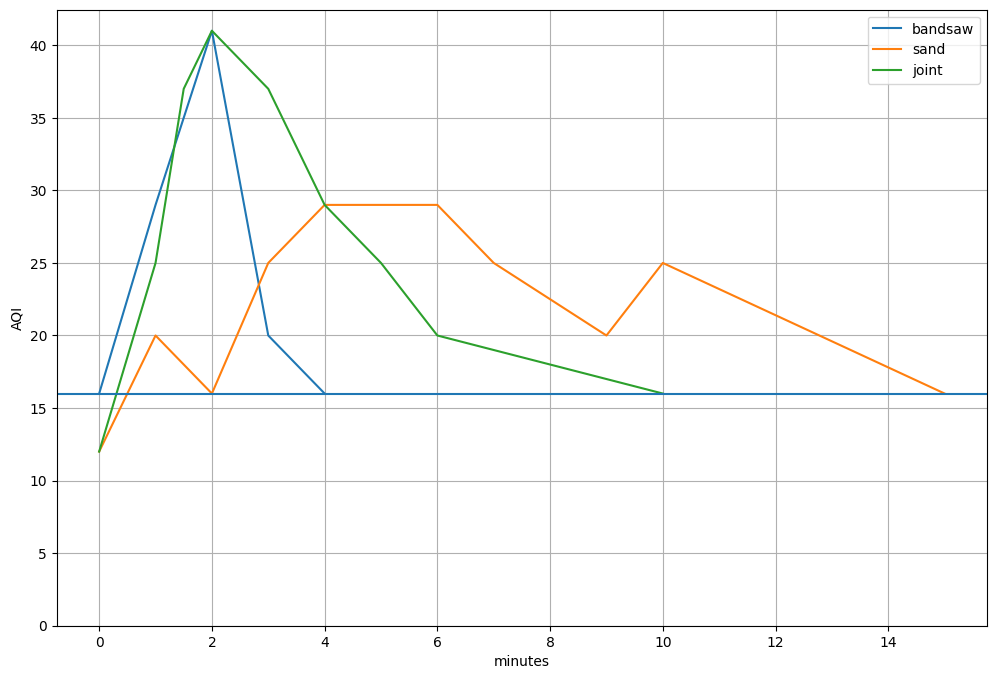

In [8]:
plot(df, ["bandsaw", "sand", "joint"])

## Is my air qual meter a piece of crap?

Noticed that the pm2.5, pm1.0, pm10 and AQI readings always seem to come out in the same
groups of values. Kinda seems like it's just measuring one of these, and then spitting out
"approximations" of the others.

In [9]:
for aqi in set(df["AQI"]):
    ps = set(map(tuple, df[df["AQI"] == aqi][["pm2.5", "pm1.0", "pm10"]].values))
    print("AQI %d -> %s" % (aqi, ",".join(map(str, ps))))

AQI 33 -> (8, 6, 9)
AQI 37 -> (9, 6, 10)
AQI 8 -> (3, 2, 3)
AQI 41 -> (10, 7, 11)
AQI 12 -> (3, 2, 3)
AQI 45 -> (11, 8, 12)
AQI 16 -> (3, 2, 3),(4, 3, 4)
AQI 20 -> (5, 3, 5)
AQI 54 -> (14, 10, 16)
AQI 25 -> (6, 4, 6)
AQI 29 -> (7, 5, 8)
AQI 57 -> (15, 11, 17)


Does seem like it...

## More sweeping data

Looked like the air cleaner helped AQI go down. Did another experiment. Not bothering with the pm readings now, as they all seem
to be more or less useless anyway.

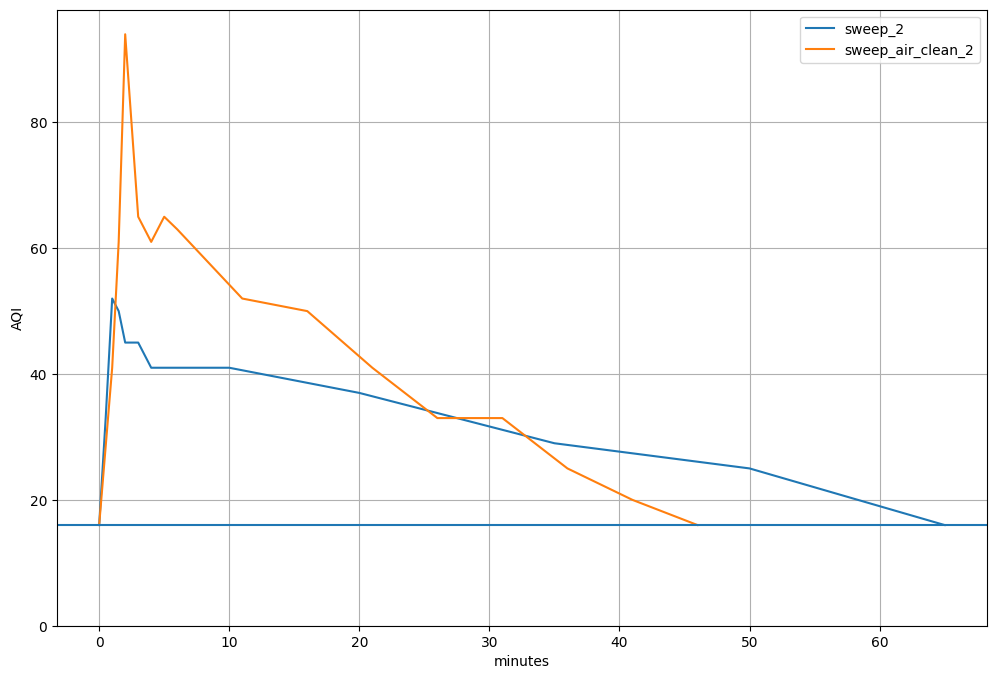

In [10]:
df2 = pd.read_csv(io.StringIO("""
op,t,AQI
sweep_2,0,16
sweep_2,0.5,33
sweep_2,1,52
sweep_2,1.5,50
sweep_2,2,45
sweep_2,3,45
sweep_2,4,41
sweep_2,5,41
sweep_2,10,41
sweep_2,20,37
sweep_2,35,29
sweep_2,50,25
sweep_2,65,16
sweep_air_clean_2,0,16
sweep_air_clean_2,1,41
sweep_air_clean_2,1.5,61
sweep_air_clean_2,2,94
sweep_air_clean_2,3,65
sweep_air_clean_2,4,61
sweep_air_clean_2,5,65
sweep_air_clean_2,6,63
sweep_air_clean_2,11,52
sweep_air_clean_2,16,50
sweep_air_clean_2,21,41
sweep_air_clean_2,26,33
sweep_air_clean_2,31,33
sweep_air_clean_2,36,25
sweep_air_clean_2,41,20
sweep_air_clean_2,46,16
"""))
plot(df2,["sweep_2", "sweep_air_clean_2"])

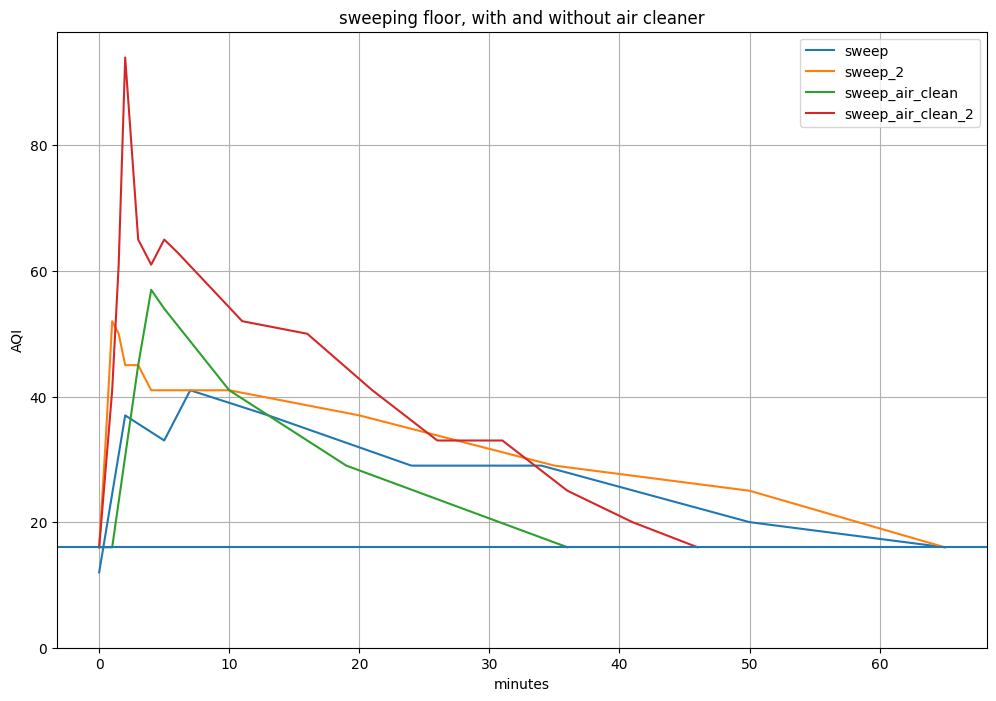

In [11]:
df3 = pd.concat([df[["op", "t", "AQI"]], df2])
plot(df3, ["sweep", "sweep_2", "sweep_air_clean", "sweep_air_clean_2"], "sweeping floor, with and without air cleaner")

The air cleaner seems to be cleaning the air. AQI falls much faster with it running.

In [12]:
import matplotlib.pyplot as plt

def plot_multiple_ops_2x2(df, ops_lists, subplot_titles=None, ylim=None, xlim=None):
    if len(ops_lists) > 4:
        raise ValueError("Maximum of 4 ops lists are allowed")

    # Set up the 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()  # Flatten the 2x2 grid to a 1D array for easy indexing

    for i, ops in enumerate(ops_lists):
        for op in ops:
            opdf = df[df["op"] == op]
            axs[i].plot(opdf["t"], opdf["AQI"], label=op, marker="o")

        axs[i].legend(loc="upper right")
        axs[i].grid()
        axs[i].axhline(16)
        axs[i].set_xlabel("minutes")
        axs[i].set_ylabel("AQI")
        if ylim:
            axs[i].set_ylim(ylim)
        if xlim:
            axs[i].set_xlim(xlim)
        if subplot_titles and i < len(subplot_titles):
            axs[i].set_title(subplot_titles[i])

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage
# plot_multiple_ops_2x2(df, ops_lists, subplot_titles=["Title 1", "Title 2", "Title 3", "Title 4"])


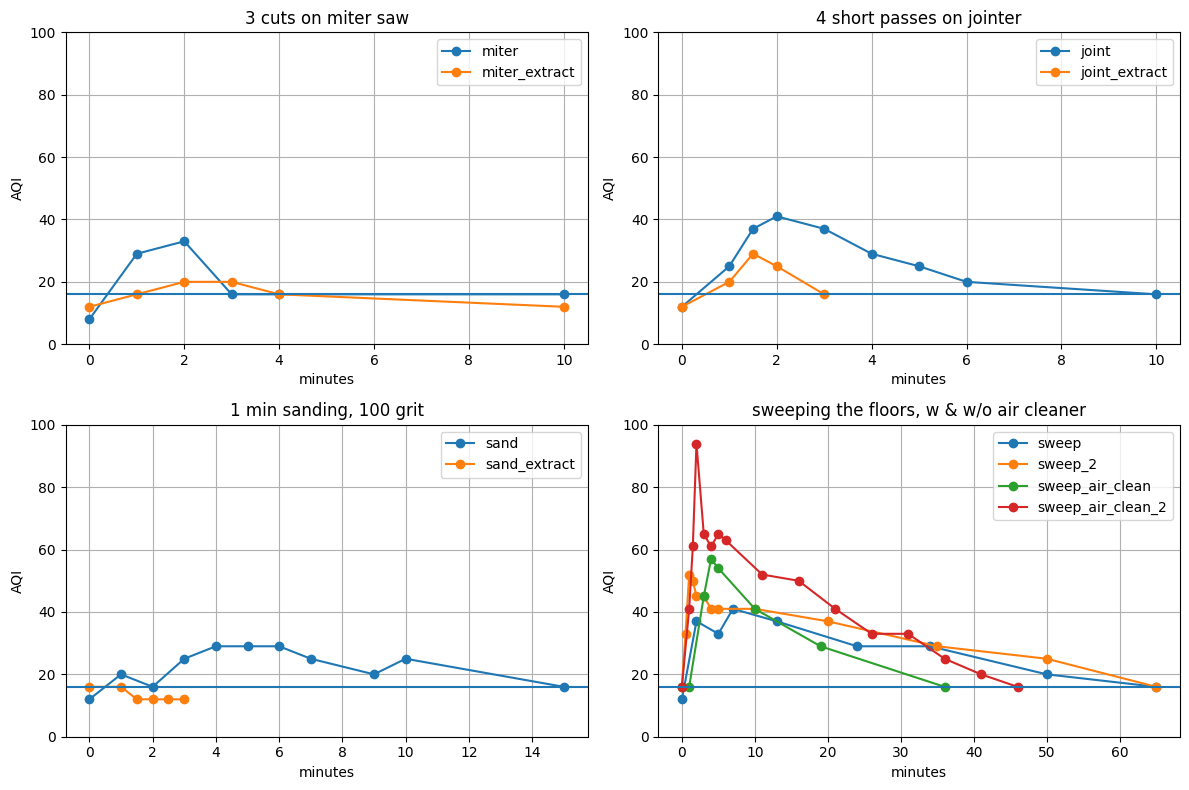

In [13]:
plot_multiple_ops_2x2(
    df3, 
    [["miter", "miter_extract"], ["joint", "joint_extract"], ["sand", "sand_extract"], ["sweep", "sweep_2", "sweep_air_clean", "sweep_air_clean_2"]], 
    ["3 cuts on miter saw", "4 short passes on jointer", "1 min sanding, 100 grit", "sweeping the floors, w & w/o air cleaner"],
    ylim=(0,100),
)